## Load fill and beam modes

In [1]:
%pylab notebook
import pytimber
import datetime
import pickle
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
mdb=pytimber.LoggingDB(source='mdb')


folder='TCSG_6.5s_scan'
output_path='/afs/cern.ch/user/n/nbiancac/ln_work/scratch0/MD/LHC/2016/'+folder+'/'
os.system('mkdir -p '+output_path)
tag='tuneshift'

beam=2

ts1 = '2016-04-23 21:05:00' # start time
ts2 = '2016-04-23 21:40:00' # end time

In [3]:
# BCT
import LHC_BCT
reload(LHC_BCT)

# data=mdb.get(LHC_BCT.variable_list(beams=[beam]),ts1,ts2)
# pickle.dump( data, open( output_path+"BCT"+tag+"_B%d.pkl"%beam, "wb" ) )
data = pickle.load( open( output_path+"BCT"+tag+"_B%d.pkl"%beam, "rb" ) )

BCT=LHC_BCT.BCT(data,beam=beam)

<IPython.core.display.Javascript object>


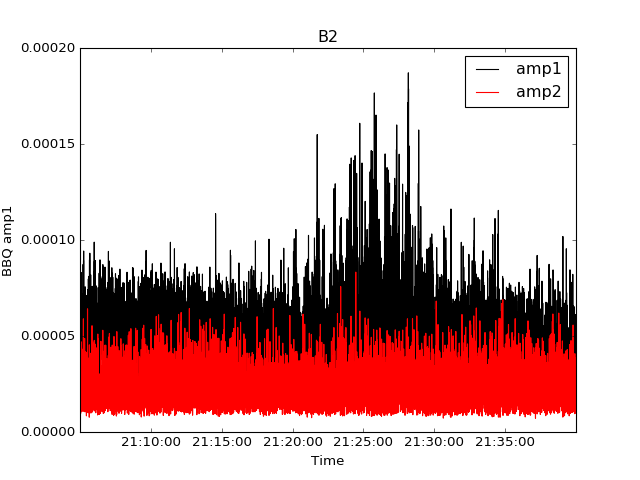

In [49]:
# BBQ

import LHC_BBQ
reload(LHC_BBQ)

# data=mdb.get(LHC_BBQ.variable_list(beams=[beam]),ts1,ts2)
# pickle.dump( data, open( output_path+"BBQ"+tag+"_B%d.pkl"%beam, "wb" ) )
data = pickle.load( open( output_path+"BBQ"+tag+"_B%d.pkl"%beam, "rb" ) )
BBQ=LHC_BBQ.BBQ(data,beam=beam)

figure()
plot(BBQ.t_str, BBQ.amp_1, "-k")
plot(BBQ.t_str, BBQ.amp_2, "-r")
xlabel("Time")
ylabel("BBQ amp1")
title('B%d'%(BBQ.beam))
legend(['amp1','amp2'])
xfmt = mpl.dates.DateFormatter('%H:%M:%S')
gca().xaxis.set_major_formatter(xfmt)

<IPython.core.display.Javascript object>


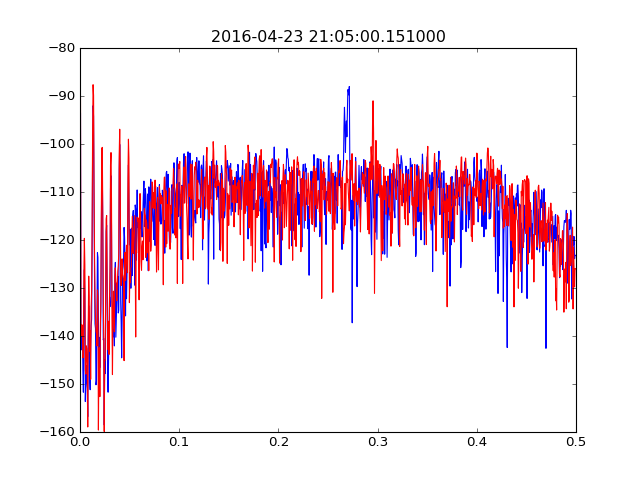

<IPython.core.display.Javascript object>


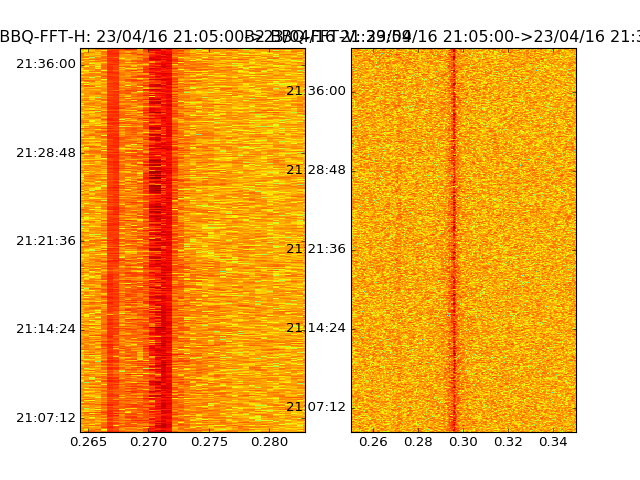

(0.25, 0.35)

In [47]:
# BBQ FFT
import LHC_BBQ

# BBQ
# data=mdb.get(LHC_BBQ.variable_list(beams=[beam]),ts1,ts2)
data = pickle.load( open( output_path+"BBQ"+tag+"_B%d.pkl"%beam, "rb" ) )
BBQ_FFT=LHC_BBQ.BBQ_FFT(data,beam=beam)
df=1./2/len((BBQ_FFT.fft_h[0]))

figure()
plot( np.arange(0,0.5,df),(BBQ_FFT.fft_h[0]), "-" )
plot(  np.arange(0,0.5,df),(BBQ_FFT.fft_v[0]), "-r" )
title(BBQ_FFT.t_str[0])

# Waterfall
figure()
subplot(1,2,1)
mindate = mpl.dates.date2num(BBQ_FFT.t_str[0])
maxdate = mpl.dates.date2num(BBQ_FFT.t_str[-1])
img = plt.imshow(BBQ_FFT.fft_h, origin='lower', cmap='jet', interpolation='nearest', aspect='auto',
                extent=(0, 0.5, mindate, maxdate))

hfmt = DateFormatter('%H:%M:%S')
gca().yaxis.set_major_formatter(hfmt)

title('B%d BBQ-FFT-H: '%BBQ_FFT.beam +
    str(BBQ_FFT.t_str[0].strftime('%d/%m/%y %H:%M:%S')) +'->'+
      str(BBQ_FFT.t_str[-1].strftime('%d/%m/%y %H:%M:%S')))

xlim(0.25, 0.35)

subplot(1,2,2)
mindate = mpl.dates.date2num(BBQ_FFT.t_str[0])
maxdate = mpl.dates.date2num(BBQ_FFT.t_str[-1])
img = plt.imshow(BBQ_FFT.fft_v, origin='lower', cmap='jet', interpolation='nearest', aspect='auto',
                extent=(0, 0.5, mindate, maxdate))

hfmt = DateFormatter('%H:%M:%S')
gca().yaxis.set_major_formatter(hfmt)

title('B%d BBQ-FFT-V: '%BBQ_FFT.beam +
    str(BBQ_FFT.t_str[0].strftime('%d/%m/%y %H:%M:%S')) +'->'+
      str(BBQ_FFT.t_str[-1].strftime('%d/%m/%y %H:%M:%S')))

xlim(0.25, 0.35)

<IPython.core.display.Javascript object>


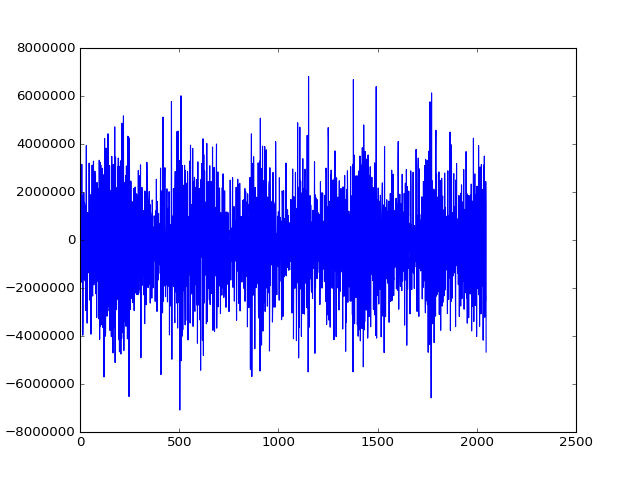

In [92]:
# RAW BBQ
import LHC_BBQ
reload(LHC_BBQ)

# data=mdb.get(LHC_BBQ.variable_list_RAW(beams=[beam]),ts1,ts2)
# pickle.dump( data, open( output_path+"BBQ_RAW"+tag+"_B%d.pkl"%beam, "wb" ) )
data = pickle.load( open( output_path+"BBQ_RAW"+tag+"_B%d.pkl"%beam, "rb" ) )

BBQG_RAW=LHC_BBQ.BBQG_RAW(data,beam=beam)

figure()
plot((BBQG_RAW.h[0]), "-" )

<IPython.core.display.Javascript object>


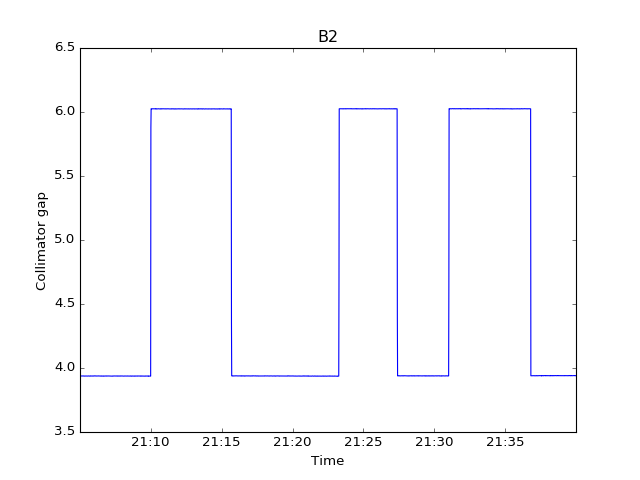

In [93]:
# Collimators

import LHC_Coll
reload(LHC_Coll)

# data=mdb.get(LHC_Coll.variable_list(beam),ts1,ts2)
# pickle.dump( data, open( output_path+"Coll"+tag+"_B%d.pkl"%beam, "wb" ) )
data = pickle.load( open( output_path+"Coll"+tag+"_B%d.pkl"%beam, "rb" ) )

Coll=LHC_Coll.Coll(data,beam=beam)
Coll.select_coll('TCSG.D5L7.B2:MEAS_LVDT_GU')

figure()
plot(Coll.t_str, Coll.values, "-b")
xlabel("Time")
ylabel("Collimator gap")
title('B%d'%(Coll.beam))
xfmt = mpl.dates.DateFormatter('%H:%M')
gca().xaxis.set_major_formatter(xfmt)

In [94]:
BBQ_app=BBQG_RAW

### Clean uncorrelated noise with SVD cut

In [95]:
cut=10


U, s, V = np.linalg.svd(BBQ_app.h, full_matrices=False)

figure()
subplot(2,2,1)
semilogx(s)
s[cut:-1]=0
semilogx(s,'r')

subplot(2,1,4)
plot(BBQ_app.h[0],'-k')
BBQ_app.h=np.dot(U,np.dot(np.diag(s),V))
plot(BBQ_app.h[0],'-r')

U, s, V = np.linalg.svd(BBQ_app.v, full_matrices=False)
subplot(2,2,2)
semilogx(s)
s[cut:-1]=0
semilogx(s,'r')

subplot(2,1,4)
plot(BBQ_app.v[0],'-k')
BBQ_app.v=np.dot(U,np.dot(np.diag(s),V))
plot(BBQ_app.v[0],'-r')





<IPython.core.display.Javascript object>

ValueError: num must be 1 <= num <= 2, not 4

###  Sussix

In [71]:
import PySUSSIX as ps

tunex=0.27
tuney=0.295;
ex=2e-3;
ey=2e-3;

wx=[tunex-ex, tunex+ex];
wy=[tuney-ey, tuney+ey];

# Sussix it!
tuney_vec=[];tunex_vec=[];
for ii in np.arange(0,len(BBQ_app.gated_h)):
    datax=BBQ_app.gated_h[ii]
    datay=BBQ_app.gated_v[ii]
    datax=datax-mean(datax)
    datay=datay-mean(datay)
    spec=ps.Sussix()
    spec.sussix_inp(nt1=1,nt2=2048,tunex=tunex,tuney=tuney,ex=ex,ey=ex,ir=1,nharm=2)
    spec.sussix(datax,0*datax, 
                datay, 0*datay, 
                0*datax, 0*datay)
    tuney=spec.oy[spec.ay.argmax()]
    tunex=spec.ox[spec.ax.argmax()]
    tunex_vec.append(np.abs(tunex))
    tuney_vec.append(np.abs(tuney))

In [76]:
BBQ_app.qh=np.array(tunex_vec)
BBQ_app.qv=np.array(tuney_vec)

In [62]:
mask_tune=(BBQ_app.qv<wy[0]) | (BBQ_app.qv>wy[1])
BBQ_app.qv[mask_tune]=np.NAN
mask_tune=(BBQ_app.qh<wx[0]) | (BBQ_app.qh>wx[1])
BBQ_app.qh[mask_tune]=np.NAN

<IPython.core.display.Javascript object>


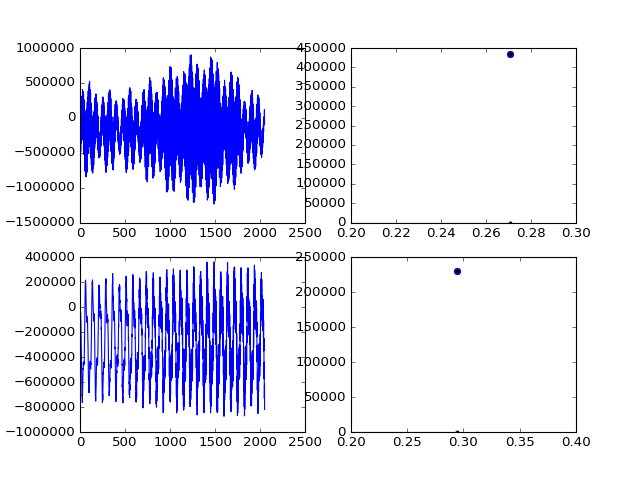

<IPython.core.display.Javascript object>


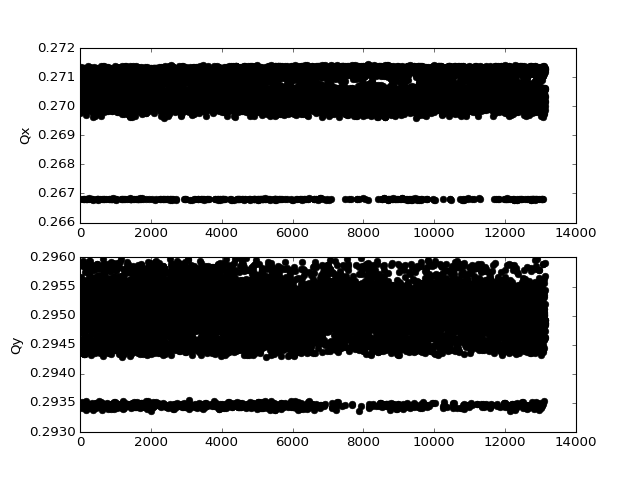

In [74]:
## plot RAW and spectrum    
figure()
subplot(2,2,1)
plot(BBQ_app.HS_h[0])
spec.ax=spec.ax[spec.ox.argsort()]
spec.ox.sort()
subplot(2,2,2)
stem(spec.ox,spec.ax,'.k')
xlim(0.2 ,0.3)

subplot(2,2,3)
plot(BBQ_app.HS_v[0])
spec.ay=spec.ay[spec.oy.argsort()]
spec.oy.sort()
subplot(2,2,4)
stem(spec.oy,spec.ay,'.k')
xlim(0.2 ,0.4)

# plot tunes
figure()
subplot(2,1,1)
plot(BBQ_app.qh, 'ok')
ylabel('Qx')
# ylim(wx[0] ,wx[1])
subplot(2,1,2)
plot(BBQ_app.qv,'ok')
ylabel('Qy')
# ylim(wx[1] ,wy[1])

In [ ]:
# fig, ax1 = plt.subplots()
# ax1.plot(Coll.t_str, Coll.values, 'b-')
# ax1.set_xlabel('time')
# ax1.set_ylabel('TDI full gap [mm]', color='b')
# for tl in ax1.get_yticklabels():
#     tl.set_color('b')
# xfmt = mpl.dates.DateFormatter('%H:%M')
# ax1.xaxis.set_major_formatter(xfmt)

# ax2 = ax1.twinx()
# ax2.plot(BBQ.t_str, BBQ.qv, 'ok',alpha=0.2,markerfacecolor='k',markeredgecolor='k')
# ax2.plot(BBQ_RAW.t_str, BBQ_RAW.qv,  'or',alpha=0.2,markerfacecolor='r',markeredgecolor='r')
# ax2.set_ylabel('Tune', color='k')
# for tl in ax2.get_yticklabels():
#     tl.set_color('k')
# ylim(0.305, 0.312)

### Moving average

In [91]:
LHC_BBQ?

In [77]:
N=50;

BBQ_app.qv=np.convolve(np.ravel(BBQ_app.qv), np.ones((N,))/N,mode='same')
Coll.values=np.convolve(Coll.values, np.ones((N,))/N,mode='same')

fig, ax1 = plt.subplots()
h0, =ax1.plot(Coll.t_str, Coll.values, 'b-')
ax1.set_xlabel('time')
ax1.set_ylabel('Coll. full gap [mm]', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
xfmt = mpl.dates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)

ax2 = ax1.twinx()
h1,=ax2.plot(BBQ_app.t_str, BBQ_app.qh, 'r.')
h2,=ax2.plot(BBQ_app.t_str, BBQ_app.qv, 'r.')
ax2.set_ylabel('BBQ', color='k')
for tl in ax2.get_yticklabels():
    tl.set_color('k')
ylim(0.25, 0.33)
legend([h0,h1,h2], ['Coll. gap','BBQ-H','BBQ-V'])

<IPython.core.display.Javascript object>

ValueError: x and y must have same first dimension

(15207,)
(15207,)


<IPython.core.display.Javascript object>


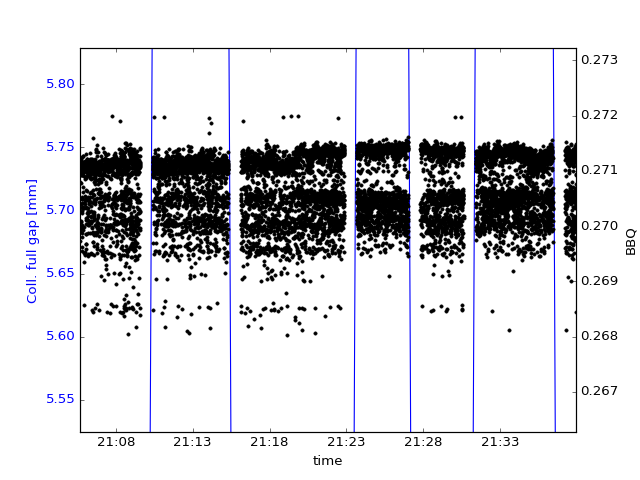

In [65]:
gu=5.9;
gd=4

Coll.interp_with(BBQ_app)
BBQ_app.interp_with(Coll)




fig, ax1 = plt.subplots()
ax1.plot(Coll.t_str, Coll.values, 'b-')
ax1.set_xlabel('time')
ax1.set_ylabel('Coll. full gap [mm]', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
xfmt = mpl.dates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)

ax2 = ax1.twinx()
mask=(Coll.values>gu) #| (Coll.values<gd)
# ax2.plot(np.array(BBQ.t_str)[mask], BBQ.qv[mask], 'ok',alpha=0.1,markerfacecolor='k',markeredgecolor='k')
ax2.plot(np.array(BBQ_app.t_str)[mask], BBQ_app.qv[mask], 'r.')
ax2.plot(np.array(BBQ_app.t_str)[mask], BBQ_app.qh[mask], 'k.')

mask=(Coll.values<gd) #| (Coll.values<gd)
# ax2.plot(np.array(BBQ.t_str)[mask], BBQ.qv[mask], 'ok',alpha=0.1,markerfacecolor='k',markeredgecolor='k')
ax2.plot(np.array(BBQ_app.t_str)[mask], BBQ_app.qv[mask], 'r.')
ax2.plot(np.array(BBQ_app.t_str)[mask], BBQ_app.qh[mask], 'k.')


ax2.set_ylabel('BBQ', color='k')
for tl in ax2.get_yticklabels():
    tl.set_color('k')
# ylim(0.308, 0.3116)


/afs/cern.ch/user/n/nbiancac/scratch0/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in less
/afs/cern.ch/user/n/nbiancac/scratch0/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in greater
/afs/cern.ch/user/n/nbiancac/scratch0/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in less
/afs/cern.ch/user/n/nbiancac/scratch0/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in greater
/afs/cern.ch/user/n/nbiancac/scratch0/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in less
/afs/cern.ch/user/n/nbiancac/scratch0/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in greater


<IPython.core.display.Javascript object>


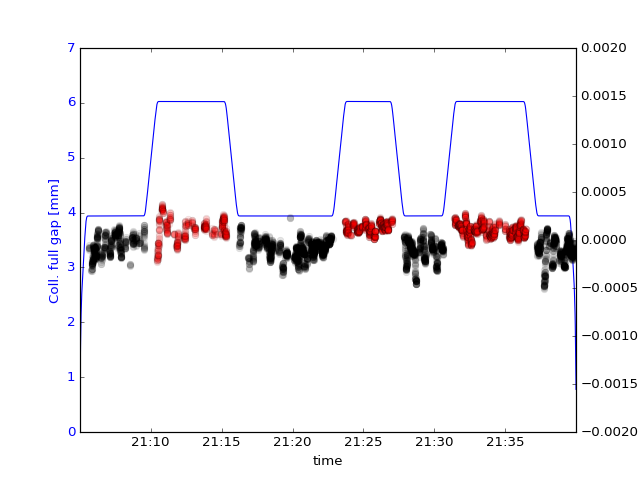

1.1e-04+/-1.5e-06
-9.3e-05+/-1.8e-06
tune shift: 2.1e-04+/-3.3e-06


In [66]:
x=BBQ_app.t_stamps
y=BBQ_app.qv

mask_tune=(y<wy[1]) & (y>wy[0])
p=np.polyfit(x[mask_tune],y[mask_tune],1)
slope=p[0]
intercept=p[1]
fit=slope*x+intercept


mask1=(Coll.values>gu) 

x=BBQ_app.t_stamps[mask1]
y=BBQ_app.qv[mask1]
fit1=fit[mask1]
mask_tune1=(y<wy[1]) & (y>wy[0])
x1=x;
y1=y-fit1
y1_mean=np.nanmean(y1[mask_tune1])
y1_std=np.nanstd(y1[mask_tune1])/np.sqrt(len(y1[mask_tune1]))

mask2=(Coll.values<gd) 
x=BBQ_app.t_stamps[mask2]
y=BBQ_app.qv[mask2]
fit2=fit[mask2]
mask_tune2=(y<wy[1]) & (y>wy[0])

x2=x
y2=y-fit2
y2_mean=np.nanmean(y2[mask_tune2])
y2_std=np.nanstd(y2[mask_tune2])/np.sqrt(len(y2[mask_tune2]))

fig, ax1 = plt.subplots()
ax1.plot(Coll.t_str, Coll.values, 'b-')
ax1.set_xlabel('time')
ax1.set_ylabel('Coll. full gap [mm]', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
xfmt = mpl.dates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)

ax2 = ax1.twinx()
ax2.plot(np.array(BBQ_app.t_str)[mask1][mask_tune1], y1[mask_tune1], 'or',alpha=.1,markerfacecolor='r',markeredgecolor='k')
ax2.plot(np.array(BBQ_app.t_str)[mask2][mask_tune2], y2[mask_tune2], 'ok',alpha=.1,markerfacecolor='k',markeredgecolor='k')
# ax2.set_ylabel('BBQ', color='k')
# for tl in ax2.get_yticklabels():
#     tl.set_color('k')
ylim(-ey, +ey)

ts_mean=y1_mean- y2_mean
ts_std=y1_std+y2_std

print '%.1e+/-%.1e'%(y1_mean,y1_std)
print '%.1e+/-%.1e'%(y2_mean,y2_std)
print 'tune shift: %.1e+/-%.1e'%(ts_mean,ts_std)

/afs/cern.ch/user/n/nbiancac/scratch0/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in less
/afs/cern.ch/user/n/nbiancac/scratch0/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in greater
/afs/cern.ch/user/n/nbiancac/scratch0/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in less
/afs/cern.ch/user/n/nbiancac/scratch0/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in greater
/afs/cern.ch/user/n/nbiancac/scratch0/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in less
/afs/cern.ch/user/n/nbiancac/scratch0/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in greater


<IPython.core.display.Javascript object>


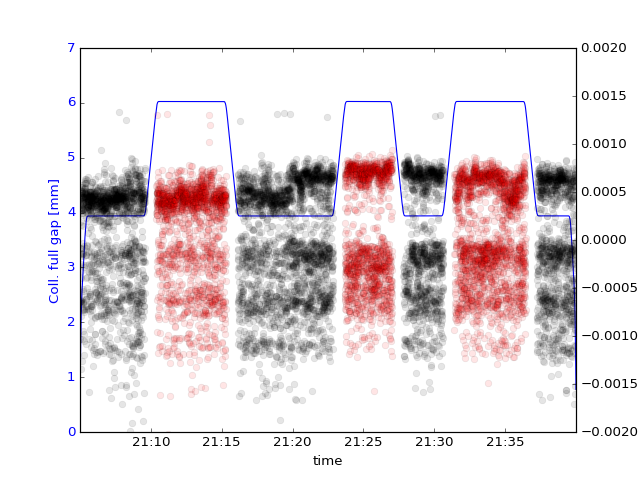

6.1e-05+/-7.6e-06
-5.0e-05+/-8.2e-06
tune shift: 1.1e-04+/-1.6e-05


In [67]:
x=BBQ_app.t_stamps
y=BBQ_app.qh

mask_tune=(y<wx[1]) & (y>wx[0])
p=np.polyfit(x[mask_tune],y[mask_tune],1)
slope=p[0]
intercept=p[1]
fit=slope*x+intercept


mask1=(Coll.values>gu) 

x=BBQ_app.t_stamps[mask1]
y=BBQ_app.qh[mask1]
fit1=fit[mask1]
mask_tune1=(y<wx[1]) & (y>wx[0])
x1=x;
y1=y-fit1
y1_mean=np.nanmean(y1[mask_tune1])
y1_std=np.nanstd(y1[mask_tune1])/np.sqrt(len(y1[mask_tune1]))

mask2=(Coll.values<gd) 
x=BBQ_app.t_stamps[mask2]
y=BBQ_app.qh[mask2]
fit2=fit[mask2]
mask_tune2=(y<wx[1]) & (y>wx[0])

x2=x
y2=y-fit2
y2_mean=np.nanmean(y2[mask_tune2])
y2_std=np.nanstd(y2[mask_tune2])/np.sqrt(len(y2[mask_tune2]))

fig, ax1 = plt.subplots()
ax1.plot(Coll.t_str, Coll.values, 'b-')
ax1.set_xlabel('time')
ax1.set_ylabel('Coll. full gap [mm]', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
xfmt = mpl.dates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)

ax2 = ax1.twinx()
ax2.plot(np.array(BBQ_app.t_str)[mask1][mask_tune1], y1[mask_tune1], 'or',alpha=.1,markerfacecolor='r',markeredgecolor='k')
ax2.plot(np.array(BBQ_app.t_str)[mask2][mask_tune2], y2[mask_tune2], 'ok',alpha=.1,markerfacecolor='k',markeredgecolor='k')
# ax2.set_ylabel('BBQ', color='k')
# for tl in ax2.get_yticklabels():
#     tl.set_color('k')
ylim(-ex, +ex)

ts_mean=y1_mean- y2_mean
ts_std=y1_std+y2_std

print '%.1e+/-%.1e'%(y1_mean,y1_std)
print '%.1e+/-%.1e'%(y2_mean,y2_std)
print 'tune shift: %.1e+/-%.1e'%(ts_mean,ts_std)

In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode()
import plotly.graph_objs as go

import datetime

BBQ.t_str=[datetime.datetime.fromtimestamp(BBQ.t_stamps[ii]) for ii in np.arange(len(BBQ.t_stamps))]
BBQ_FFT.t_str=[datetime.datetime.fromtimestamp(BBQ_FFT.t_stamps[ii]) for ii in np.arange(len(BBQ_FFT.t_stamps))]
BCT.t_str=[datetime.datetime.fromtimestamp(BCT.t_stamps[ii]) for ii in np.arange(len(BCT.t_stamps))]
Energy.t_str=[datetime.datetime.fromtimestamp(Energy.t_stamps[ii]) for ii in np.arange(len(Energy.t_stamps))]
BSRT.t_str=[datetime.datetime.fromtimestamp(BSRT.t_stamps[BSRT.bunch_n==1785][ii]) for ii in np.arange(len(BSRT.t_stamps[BSRT.bunch_n==1785]))]

In [ ]:
beam=1



BBQ.t_str=[datetime.datetime.fromtimestamp(BBQ.t_stamps[ii]) for ii in np.arange(len(BBQ.t_stamps))]
BBQ_FFT.t_str=[datetime.datetime.fromtimestamp(BBQ_FFT.t_stamps[ii]) for ii in np.arange(len(BBQ_FFT.t_stamps))]
BCT.t_str=[datetime.datetime.fromtimestamp(BCT.t_stamps[ii]) for ii in np.arange(len(BCT.t_stamps))]
Energy.t_str=[datetime.datetime.fromtimestamp(Energy.t_stamps[ii]) for ii in np.arange(len(Energy.t_stamps))]
BSRT.t_str=[datetime.datetime.fromtimestamp(BSRT.t_stamps[BSRT.bunch_n==1785][ii]) for ii in np.arange(len(BSRT.t_stamps[BSRT.bunch_n==1785]))]

trace1 = go.Scatter(
    x=(BSRT_B1.t_str),
    y=BSRT_B1.sigma_h,
    name='BSRT'
)
trace2 = go.Scatter(
    x=(Energy.t_str),
    y=Energy.energy,
    name='Energy',
    yaxis='y2'
)
trace3 = go.Scatter(
    x=(BBQ_B1.t_str),
    y=BBQ_B1.xamp_1,
    name='BBQ',
    yaxis='y3'
)
data = [trace1, trace2, trace3]
layout = go.Layout(
    title='B%d'%beam,
    width=1000,
    xaxis=dict(
        domain=[0.1, 0.9]
    ),
    yaxis=dict(
        title='BSRT',
        titlefont=dict(
            color='#1f77b4'
        ),
        tickfont=dict(
            color='#1f77b4'
        ),
        exponentformat='e',
        position=0.05,
    ),
    yaxis2=dict(
        title='Energy',
        titlefont=dict(
            color='#ff7f0e'
        ),
        tickfont=dict(
            color='#ff7f0e'
        ),
        anchor='free',
        overlaying='y',
        side='left',
        exponentformat='e',
        position=0.15
    ),
    yaxis3=dict(
        title='BBQ',
        titlefont=dict(
            color='#d62728'
        ),
        tickfont=dict(
            color='#d62728'
        ),
        anchor='x',
        overlaying='y',
        side='right'
    ),
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)